CONVERTING NON STATIONARY DATA TO STATIONARY DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ARECANUT_TIMESERIES_PRICE_DATA_2001-2023.csv')
data

,month,value
0,2002-04-01,6244.49
1,2002-05-01,6265.38
2,2002-06-01,6870.24
3,2002-07-01,8991.53
4,2002-08-01,4865.00
...,...,...
254,2023-07-01,45531.73
255,2023-08-01,43602.64
256,2023-09-01,44407.73
257,2023-10-01,42625.35


In [ ]:
data['month']=pd.to_datetime(data['month'])

(array([44., 72., 23.,  7., 16., 28., 28.,  8., 18., 15.]),
 array([ 3486.31 ,  7854.044, 12221.778, 16589.512, 20957.246, 25324.98 ,
        29692.714, 34060.448, 38428.182, 42795.916, 47163.65 ]),
 <BarContainer object of 10 artists>)

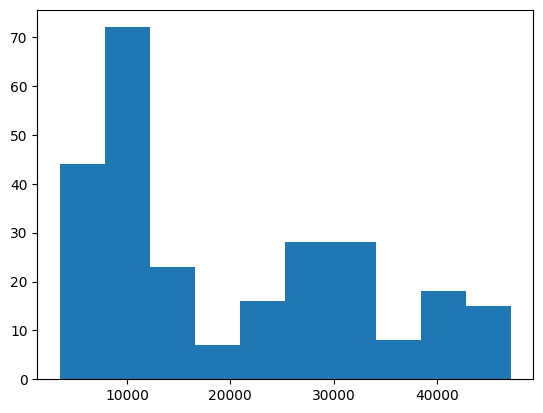

In [ ]:
plt.hist(data['value'])

In [ ]:
data=data.set_index('month')

In [ ]:
data

,value
month,
2002-04-01,6244.49
2002-05-01,6265.38
2002-06-01,6870.24
2002-07-01,8991.53
2002-08-01,4865.00
...,...
2023-07-01,45531.73
2023-08-01,43602.64
2023-09-01,44407.73


DIFFERENCING
1.SHIFT DIFFERENCING
2.SEASONAL DIFFERENCING

A)SHIFT DIFFERENCING

In [ ]:
data['shift_diff']=data['value']-data['value'].shift(1)

In [ ]:
data['shift_diff'].dropna()

month
2002-05-01      20.89
2002-06-01     604.86
2002-07-01    2121.29
2002-08-01   -4126.53
2002-09-01   -1378.69
               ...   
2023-07-01    1862.33
2023-08-01   -1929.09
2023-09-01     805.09
2023-10-01   -1782.38
2023-11-01    -760.20
Name: shift_diff, Length: 258, dtype: float64

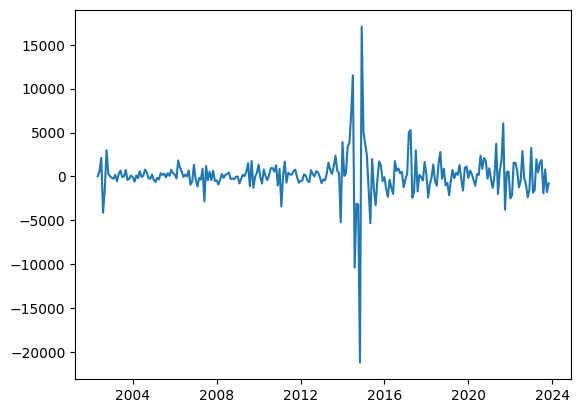

In [ ]:
plt.plot(data['shift_diff'])
plt.show()

b)SEASONAL DIFFERENCING

In [ ]:
data['seasonal_diff']=data['value']-data['value'].shift(3)

In [ ]:
data['seasonal_diff'].dropna()

month
2002-07-01    2747.04
2002-08-01   -1400.38
2002-09-01   -3383.93
2002-10-01   -2515.99
2002-11-01    1923.82
               ...   
2023-07-01    3898.14
2023-08-01    1516.00
2023-09-01     738.33
2023-10-01   -2906.38
2023-11-01   -1737.49
Name: seasonal_diff, Length: 256, dtype: float64

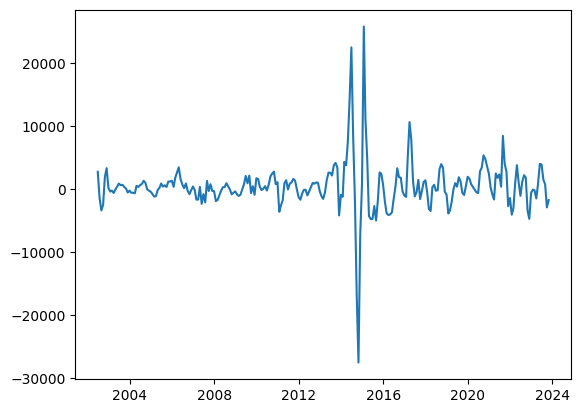

In [ ]:
plt.plot(data['seasonal_diff'])
plt.show()

TRANSFORMATION
1.LOG
2.SQRT
3.CBRT

A)LOG TRANSFORMATION

In [ ]:
data['log']=np.log(data['value'])
data['log'].dropna()


month
2002-04-01     8.739455
2002-05-01     8.742795
2002-06-01     8.834954
2002-07-01     9.104038
2002-08-01     8.489822
                ...    
2023-07-01    10.726165
2023-08-01    10.682873
2023-09-01    10.701169
2023-10-01    10.660204
2023-11-01    10.642209
Name: log, Length: 259, dtype: float64

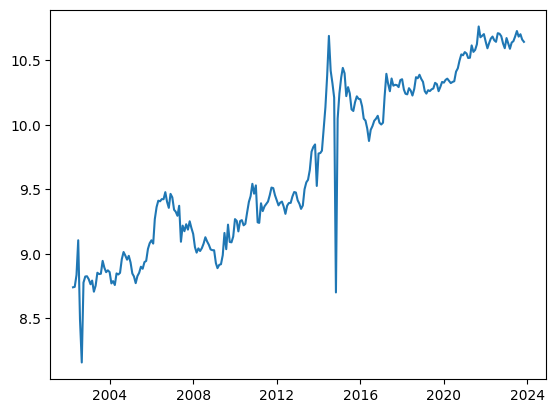

In [ ]:
plt.plot(data['log'])
plt.show()

B)SQUAREROOT TRANSFORMATION

In [ ]:
data['sqrt']=np.sqrt(data['value'])
data['sqrt'].dropna()

month
2002-04-01     79.022086
2002-05-01     79.154153
2002-06-01     82.886911
2002-07-01     94.823678
2002-08-01     69.749552
                 ...    
2023-07-01    213.381653
2023-08-01    208.812452
2023-09-01    210.731417
2023-10-01    206.459076
2023-11-01    204.609751
Name: sqrt, Length: 259, dtype: float64

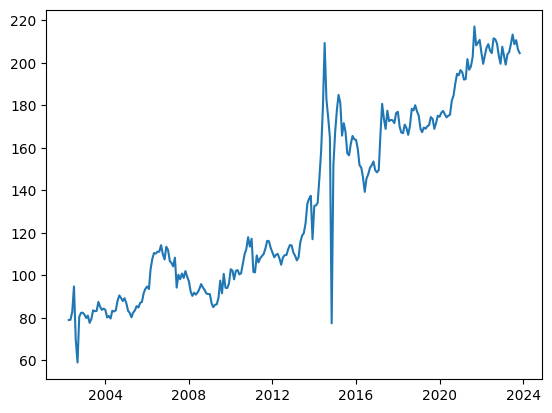

In [ ]:
plt.plot(data['sqrt'])
plt.show()

C)CUBEROOT TRANSFORMATION

In [ ]:
data['cbrt']=np.cbrt(data['value'])
data['cbrt'].dropna()

month
2002-04-01    18.414743
2002-05-01    18.435255
2002-06-01    19.010373
2002-07-01    20.794311
2002-08-01    16.944455
                ...    
2023-07-01    35.708482
2023-08-01    35.196888
2023-09-01    35.412196
2023-10-01    34.931936
2023-11-01    34.723025
Name: cbrt, Length: 259, dtype: float64

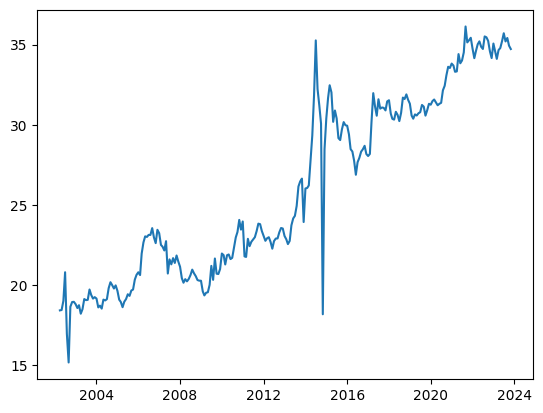

In [ ]:
plt.plot(data['cbrt'])
plt.show()

3.ROLLING STATS

In [ ]:
data['roll']=data['value'].rolling(window=10).mean()

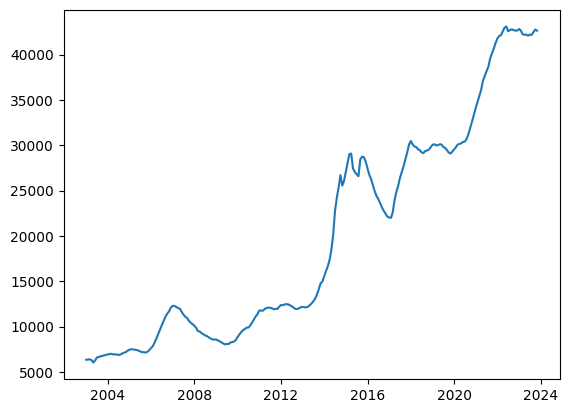

In [ ]:
plt.plot(data['roll'])
plt.show()

In [ ]:
data['roll'].dropna()

month
2003-01-01     6343.652
2003-02-01     6358.515
2003-03-01     6389.828
2003-04-01     6306.309
2003-05-01     6039.072
                ...    
2023-07-01    42188.522
2023-08-01    42176.480
2023-09-01    42483.167
2023-10-01    42760.560
2023-11-01    42635.857
Name: roll, Length: 250, dtype: float64

AUGMENTED DICKY FULLER TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller
adtest=adfuller(data['roll'].dropna())
print('p-value : ',adtest[1])

p-value :  0.9816659856458114


In [ ]:
adtest=adfuller(data['cbrt'])
print('p-value : ',adtest[1])

p-value :  0.9321237180855331


In [ ]:
adtest=adfuller(data['sqrt'])
print('p-value : ',adtest[1])

p-value :  0.8835208056405471


In [ ]:
adtest=adfuller(data['log'])
print('p-value : ',adtest[1])

p-value :  0.8691515578798401


In [ ]:
adtest=adfuller(data['seasonal_diff'].dropna())
print('p-value : ',adtest[1])

p-value :  0.00019586975822049175


In [ ]:
adtest=adfuller(data['shift_diff'].dropna())
print('p-value : ',adtest[1])

p-value :  4.533997860395468e-22


AUTO CORRELATION

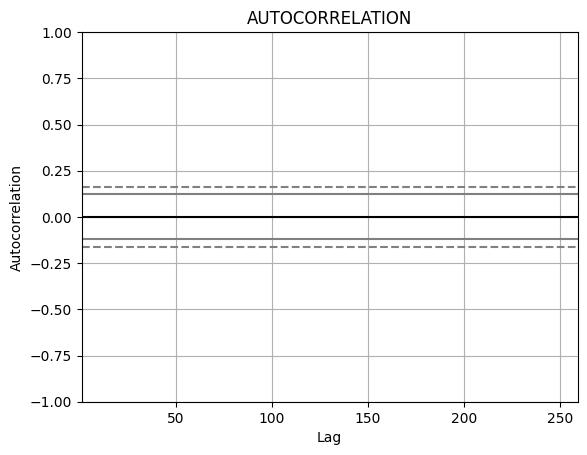

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['seasonal_diff'])
plt.title("AUTOCORRELATION")
plt.show()

HISTOGRAM OF SEASONAL DIFFERENCING SHOWING GAUSSIAN DISTRIBUTION

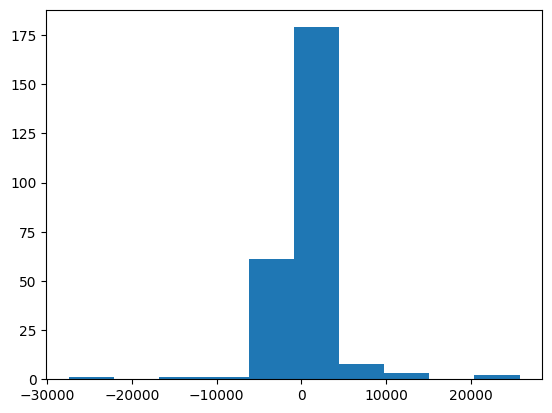

In [ ]:
plt.hist(data['seasonal_diff'])
plt.show()

BOXCOX TRANSFORMATION

In [ ]:
from scipy.stats import boxcox

In [ ]:
boxcox_data=boxcox(data['value'])
boxcox_data

(array([6.62048408, 6.62234695, 6.67358886, 6.82141046, 6.48005945,
        6.28892756, 6.64072756, 6.66697789, 6.66813694, 6.65519045,
        6.63359602, 6.64950238, 6.60143118, 6.62711249, 6.68316093,
        6.67744481, 6.67882045, 6.73400147, 6.70486358, 6.68562242,
        6.69352408, 6.68597547, 6.63728039, 6.6471572 , 6.63035905,
        6.68029441, 6.67570807, 6.68267357, 6.74121502, 6.77163401,
        6.75689628, 6.73914144, 6.7553908 , 6.72721038, 6.67985856,
        6.66747693, 6.63838306, 6.66874238, 6.68327023, 6.70889574,
        6.70033254, 6.72868212, 6.73364524, 6.78472017, 6.80862913,
        6.82121909, 6.80740213, 6.91002219, 6.96024481, 6.98672444,
        6.98427055, 6.99316522, 6.99281304, 7.02200642, 6.98234425,
        6.95698709, 7.01486141, 7.00035722, 6.94910916, 6.94120133,
        6.92409555, 6.96564824, 6.81512323, 6.88300617, 6.85953445,
        6.88887304, 6.8661614 , 6.9010985 , 6.87303565, 6.84806933,
        6.79226376, 6.76905031, 6.78700167, 6.77

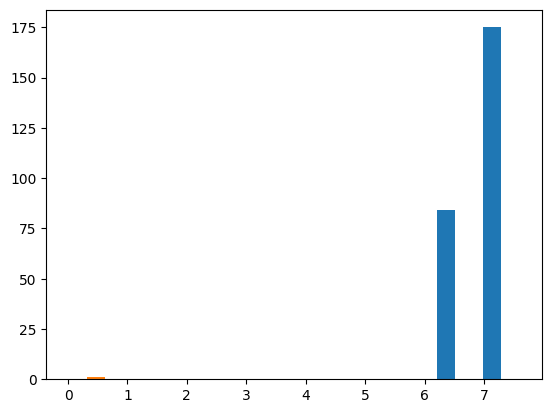

In [ ]:
plt.hist(boxcox_data)
plt.show()

YEO-JHONSON TRANSFORMATION

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
data1=np.array(data['value'].tolist()).reshape(-1,1)
pt_data=pt.fit_transform(data1)


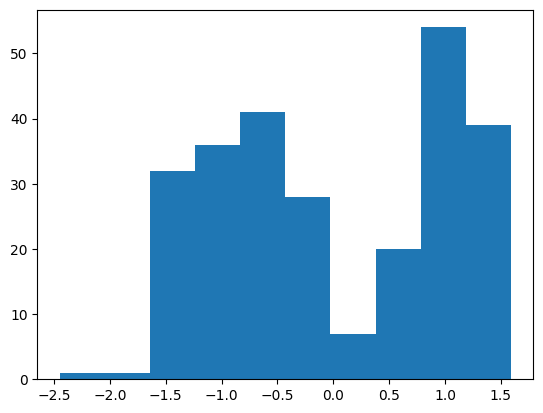

In [ ]:
plt.hist(pt_data)
plt.show()

In [ ]:
adtest=adfuller(pt_data)
print('p-value : ',adtest[1])

p-value :  0.8506518191383521


In [ ]:
data['seasonal_diff']

month
2002-04-01        NaN
2002-05-01        NaN
2002-06-01        NaN
2002-07-01    2747.04
2002-08-01   -1400.38
               ...   
2023-07-01    3898.14
2023-08-01    1516.00
2023-09-01     738.33
2023-10-01   -2906.38
2023-11-01   -1737.49
Name: seasonal_diff, Length: 259, dtype: float64

AUTO CORRELATION FUNCTION AND PARTIAL AUTO CORRELATION FUNCTION

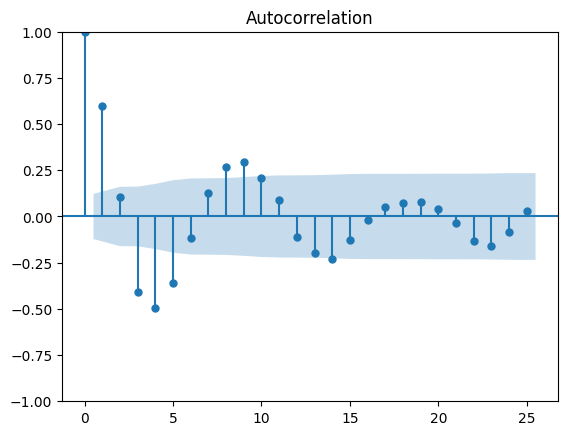

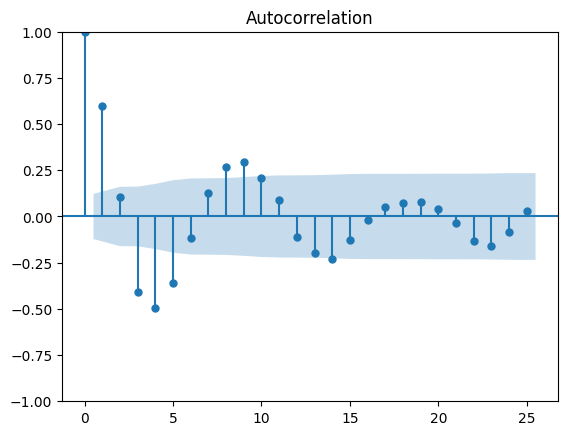

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['seasonal_diff'].dropna())

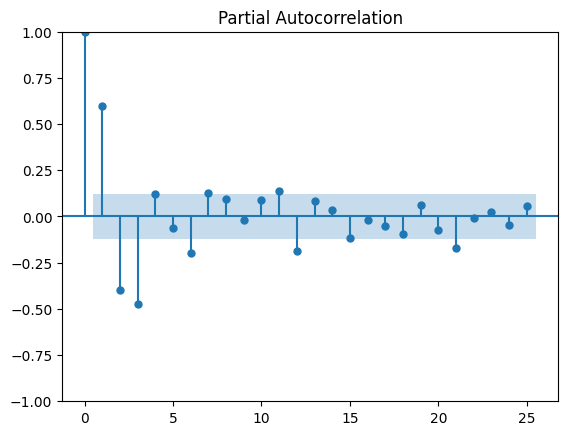

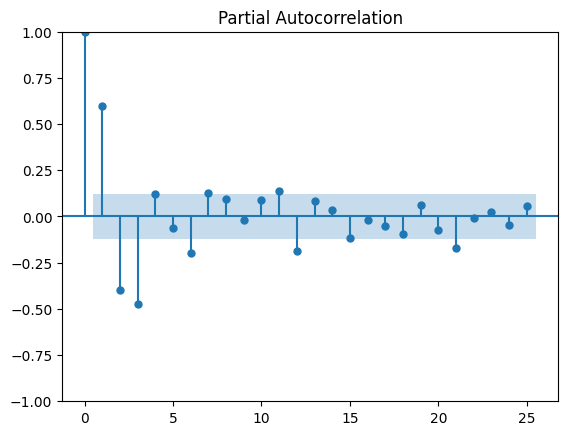

In [ ]:
plot_pacf(data['seasonal_diff'].dropna())